# pandas新增数据列

在进行数据分析的过程中，经常需要按照一定条件创建新的数据列，然后进一步分析

1. 直接赋值
2. df.apply方法
3. df.assign方法
4. 按条件选择分组分别赋值

In [1]:
import pandas as pd

# 读取数据
file_path = "./data/beijing_tianqi/beijing_tianqi_2018.csv"

df = pd.read_csv(file_path)
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


## 1、 直接赋值的方法

实例：清理温度列 变成数字类型

In [2]:
# 替换掉温度后面的后缀℃
df.loc[:, "bWendu"] = df['bWendu'].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df['yWendu'].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [3]:
# 实例：计算温差
# 注意，df['bWendu']是一个Series，后面的减法返回的是Series
df.loc[:, 'wenCha'] = df['bWendu'] - df['yWendu']
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9


## 2、 `df.apply`方法

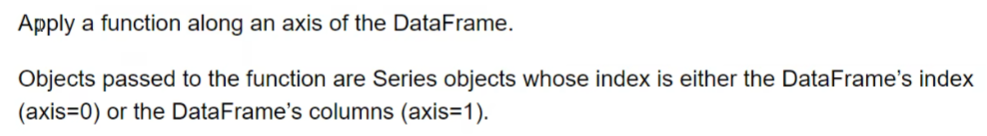

实例：添加一列温度类型

1. 如果最高温度大于33度就是高温
2. 低于-10就是低温
3. 否则是常温

In [4]:
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9
...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9


In [5]:
def get_type_wendu(x):
    if x['bWendu'] > 33:
        return '高温'
    if x["yWendu"] < -10:
        return '低温'
    return '常温'

# 注意需要设置参数axis=1 这表示series的index是columns
df.loc[:, 'type_wendu'] = df.apply(get_type_wendu, axis=1)
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha,type_wendu
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,常温
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,常温
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,常温
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,常温
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,常温
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7,低温
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8,低温
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9,低温
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9,低温


In [6]:
# 查看温度类型的计数
df["type_wendu"].value_counts()

type_wendu
常温    328
高温     29
低温      8
Name: count, dtype: int64

## 3、 df.assign方法

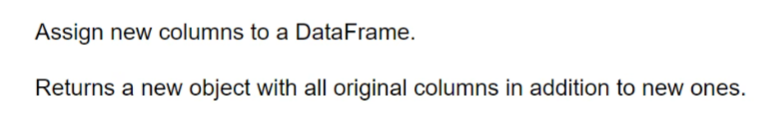

In [8]:
# 实例：将摄氏温度转换成华氏温度
# 返回一个新对象
df.assign(
    yWendu_Huashi = lambda x: x["yWendu"] * 9 / 5 + 32,
    bWendu_Huashi = lambda x: x['bWendu'] * 9 / 5 + 32
)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha,type_wendu,yWendu_Huashi,bWendu_Huashi
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,常温,21.2,37.4
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,常温,23.0,35.6
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,常温,23.0,35.6
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,常温,17.6,32.0
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,常温,21.2,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7,低温,10.4,23.0
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8,低温,12.2,26.6
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9,低温,10.4,26.6
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9,低温,12.2,28.4


In [9]:
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha,type_wendu
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,常温
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,常温
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,常温
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,常温
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,常温
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7,低温
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8,低温
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9,低温
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9,低温


## 4、 按条件选择分组分别赋值

In [11]:
# 先创建空列 （这是第一种创建新列的方法）
df['wencha_type'] = ''
df.loc[df["bWendu"]-df['yWendu']>10, "wencha_type"] = "温差大"
df.loc[df["bWendu"]-df['yWendu']<=10, "wencha_type"] = "温差小"
df

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wenCha,type_wendu,wencha_type
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,常温,温差小
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,常温,温差小
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,常温,温差小
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,常温,温差小
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,常温,温差小
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7,低温,温差小
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8,低温,温差小
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9,低温,温差小
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9,低温,温差小


In [12]:
df['wencha_type'].value_counts()

wencha_type
温差小    187
温差大    178
Name: count, dtype: int64